# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "project_data_with_percapita_consumption.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

#coffee_data.tail()
coffee_data.head()
coffee_data.columns
# plt.rcParams["figure.figsize"] = 16,9


Index(['Country Name', 'Year', 'Coffee Consumed', 'MEASURE',
       'gdp_per_hour_worked ($)', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'population', 'Unemployed (%)', 'Coffee Consumed in KG',
       'Coffee Consumed per Capita in Kg'],
      dtype='object')

## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?
mean coffee consumption by year (line graph) - 
x axis = year
y axis = coffee amount
Karen

## 1-2. Coffee Consumption Trend by Country: How Much Coffee Is Consumed by Year (in Total)?
use project_data.csv to generate the plot. (line graph) - mean by year. Plot in line.
Karen

## 3-1. Overall Productivity Trend: Does Productivity Grow by Year? (Growth in labour productivity indicates a higher level of output for every hour worked)
mean productivity (line plot)
x axis = year
y axis = GDPhrwkd
Jin


## 3-2. Productivity Trend by Country: How Does Productivity Change by Country Over Time?
use project_data.csv to generate the plot. (line graph)  - GDP per hour worked
Jin

## 2. Top Coffee Drinking Nations (per Capita, kg or lb): Which Country Drinks Coffee the Most per Person in 20XX?
use project_data.csv to generate the plot. (bar graph) - top 10? 
Srini

In [3]:
# Top 10 cofee drinking nations
group_by_country = coffee_data.groupby(["Country Name"])
#Mean of all values by country
mean_values_country = group_by_country.mean()
mean_values_country_df = pd.DataFrame(mean_values_country)
mean_values_country_df

,Year,Coffee Consumed,gdp_per_hour_worked ($),gdp_per_capita ($),population,Unemployed (%),Coffee Consumed in KG,Coffee Consumed per Capita in Kg
Country Name,,,,,,,,
Austria,2006.0,947.733333,48.941178,41673.933333,7.833810e+06,4.306667,5.686400e+07,7.254740
Belgium,2006.0,1110.466667,60.540606,39631.266667,1.000976e+07,7.720000,6.662800e+07,6.672928
Bulgaria,2006.0,380.533333,16.501836,4938.866667,7.362312e+06,11.933333,2.283200e+07,3.111886
Croatia,2006.0,364.933333,25.379076,11103.333333,4.192666e+06,13.460000,2.189600e+07,5.223574
Czech Republic,2006.0,606.466667,28.837939,15341.600000,9.842236e+06,7.226667,3.638800e+07,3.698309
Denmark,2006.0,791.400000,57.955926,52241.400000,5.125666e+06,5.386667,4.748400e+07,9.271576
Estonia,2006.5,117.428571,24.561708,12889.642857,1.281465e+06,10.107143,7.045714e+06,5.500538
Finland,2006.0,1039.466667,48.167631,42034.133333,4.988896e+06,8.326667,6.236800e+07,12.495654
France,2006.0,5451.733333,55.281991,38529.000000,5.755249e+07,9.220000,3.271040e+08,5.683920


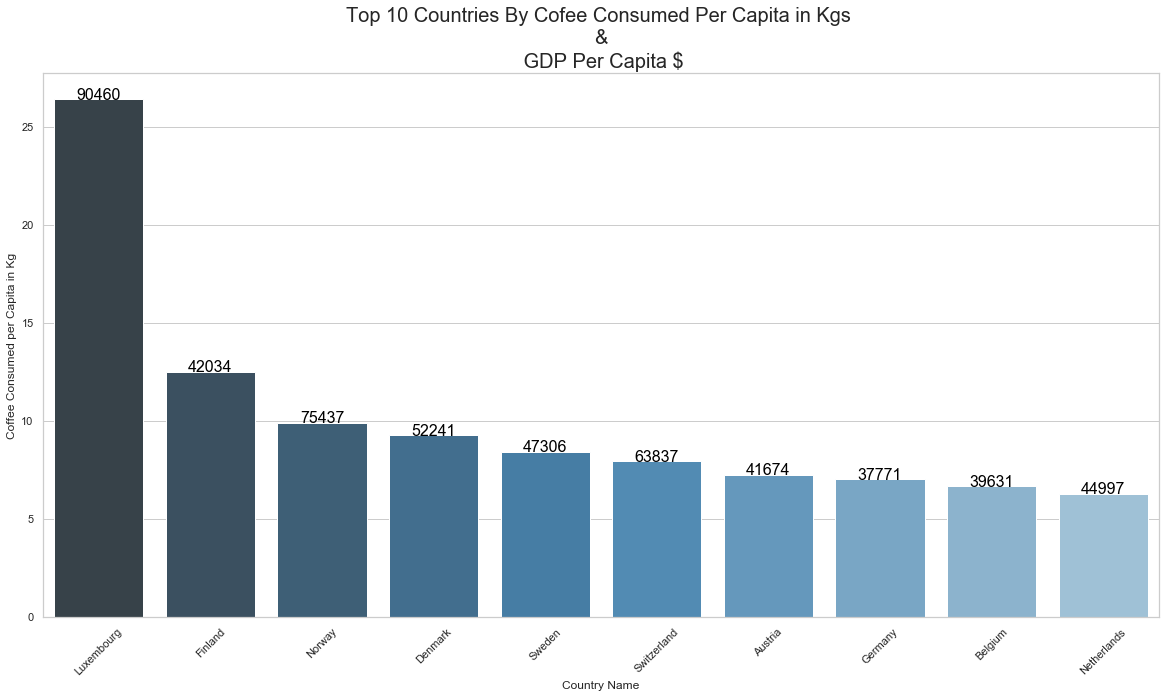

In [4]:
#top 10 Coffee drinking per capita
top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False)\
.head(10).reset_index()
#top_coffee_pc
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
g=sns.barplot(x='Country Name',y='Coffee Consumed per Capita in Kg',data=top_coffee_pc, palette="Blues_d")

for index, row in top_coffee_pc.iterrows():
   g.text(index,row['Coffee Consumed per Capita in Kg'],\
           '{:1.0f}'.format(row['gdp_per_capita ($)']),color='black',fontsize=16,ha='center')

plt.xticks(rotation=45)
plt.title('Top 10 Countries By Cofee Consumed Per Capita in Kgs \n&\n GDP Per Capita $', size =20)
plt.savefig("Top_10_Coffee.png")
plt.show()

## 4. Top Productivity Countries in 20XX: Which Countries Show Higher Productivity Compare to Other Countries?
use project_data.csv to generate the plot. (bubble plot)
x axis = countries
y axis = productivity (GDPhrworkd)
bar graph or scatter plot
all countries in data
Srini

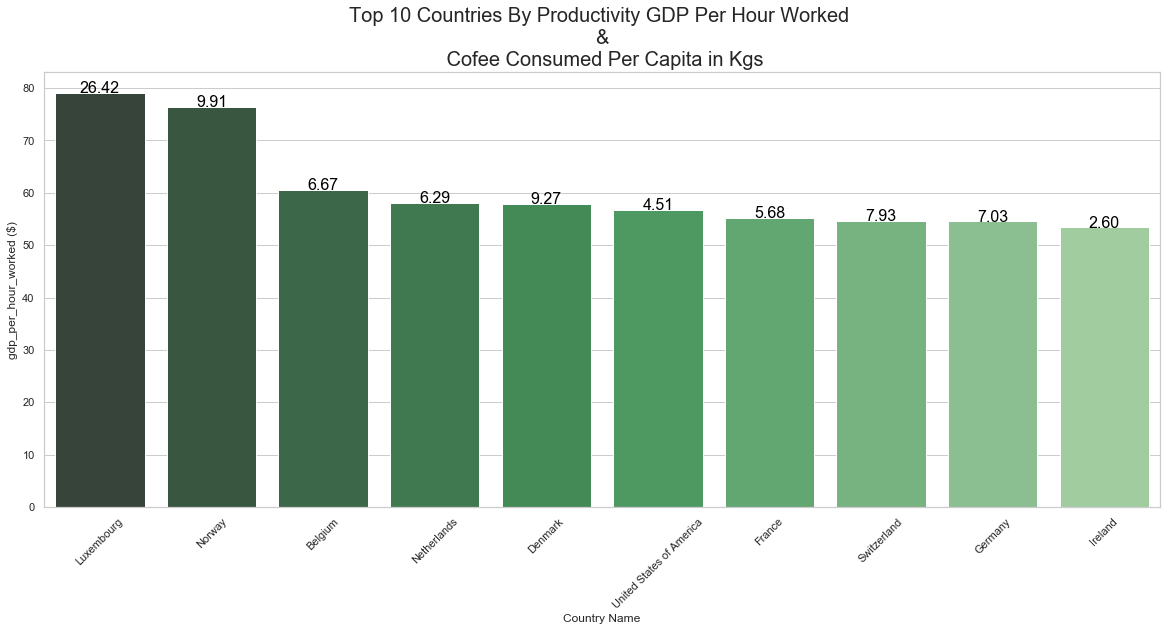

In [5]:
# Top 10 productivity countries per capita
top_productivity_pc = mean_values_country_df.sort_values("gdp_per_hour_worked ($)", ascending = False)\
.head(10).reset_index()
top_productivity_pc
median = top_productivity_pc["gdp_per_hour_worked ($)"].median()
#top 10 Coffee drinking per person graph
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productivity_pc, palette="Greens_d")

for index, row in top_productivity_pc.iterrows():
   g.text(index,row['gdp_per_hour_worked ($)'],\
           '{:1.2f}'.format(row['Coffee Consumed per Capita in Kg']),color='black',fontsize=16,ha='center')

plt.xticks(rotation=45)
#plt.grid(True)
plt.title('Top 10 Countries By Productivity GDP Per Hour Worked \n&\n Cofee Consumed Per Capita in Kgs', size =20)
plt.savefig("Top_10_Productive.png")
plt.show()

## 5-1. Correlation Between Coffee Consumption and Productivity: Does the amount of Coffee Consumption affect Productivity among countries? (Pick a certain year, ex: 2013)
use project_data.csv to generate the plot. (bubble plot and regression)
x axis = country
y axis = GPDhrwkd
bubble size coffee consumption?
(maybe swap y axis and bubble size?)
maybe a whisker plot - how far away from mean?
total consumption and total GDPhrwkd for selected years (pick maybe two or three to compare?)
Michael

## 5-2. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity throughout Certain period? (dynamic analysis, Pick countries which show bigger changes in values) 
use project_data.csv to generate the plot. (scatter plot and regression)

x axis = country 
y axis = gdphrwkd
calculate the increased/decreased value of consumption
calculate the increased/decreased value of GDPhrwkd
ex: all years or 10 years (if plot is too busy) or in some increment (2 years, 5 years)?
look for dramatic changes
Michael


## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
P-Value graph
this assumes a single year in 5-1
Andrew

## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

## 7. Correlation Between Coffee Consumption and Unemployment: A question needs to be defined (optional)
use project_data.csv to generate the plot. 


## 8. World Coffee Major Producers as % of World: Which Countries Produce Coffee? (optional)
use exports data from www.ico.org/new_historical.asp to generate the plot.(pie chart or bubble map??)

## Conclusions
Summary of findings - Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en